In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


checking the info of this dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:
df.drop(columns='PassengerId',inplace=True)

In [8]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
15,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
210,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,NaN,S
22,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
402,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C


In [9]:
df['Cabin'].nunique()

76

<Figure size 640x480 with 0 Axes>

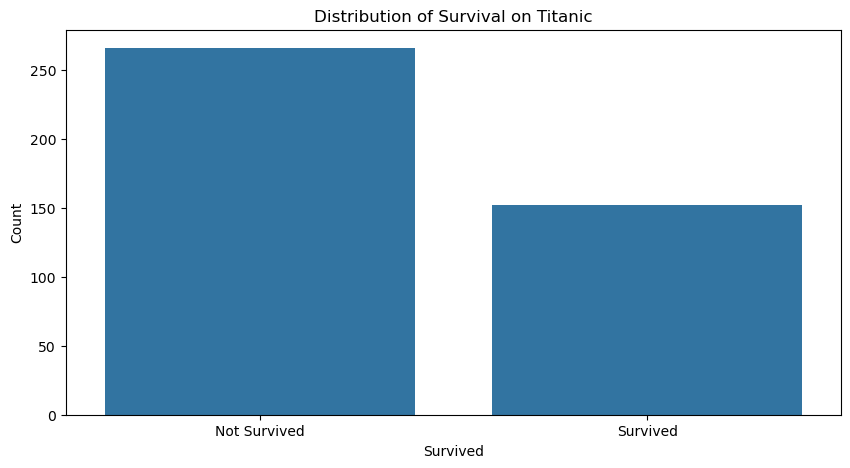

In [10]:
# Visualizing the distribution of the 'Survived' column
plt.figure()
fig ,ax = plt.subplots(figsize=(10, 5))
sns.countplot(x = 'Survived' , data = df ,ax =ax )
plt.title('Distribution of Survival on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [11]:
df['Age'].isnull().sum()

86

In [12]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [13]:
df['Embarked'].isnull().sum()

0

In [14]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

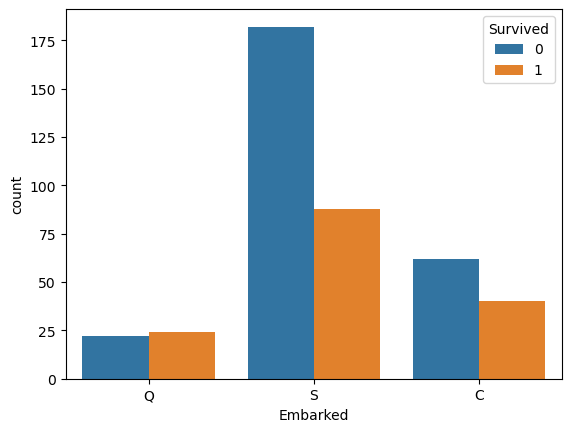

In [15]:
sns.countplot(x = 'Embarked' , data = df ,hue = 'Survived')

In [16]:
df['Age'].isnull().sum()

86

In [17]:
df['Age_Imputed'] = df['Age']

In [18]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Imputed
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [19]:
df['Age_Imputed'][df['Age_Imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum(),replace=True , random_state=2)

C:\Users\swaya\AppData\Local\Temp\ipykernel_21332\3244291570.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_Imputed'][df['Age_Imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum(),replace=True , random_state=2

In [20]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Imputed
301,0,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C,28.0
114,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,63.0
343,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,58.0
157,1,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S,23.0
184,1,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,27.0


In [21]:
df['Age_Imputed'].isnull().sum()

0

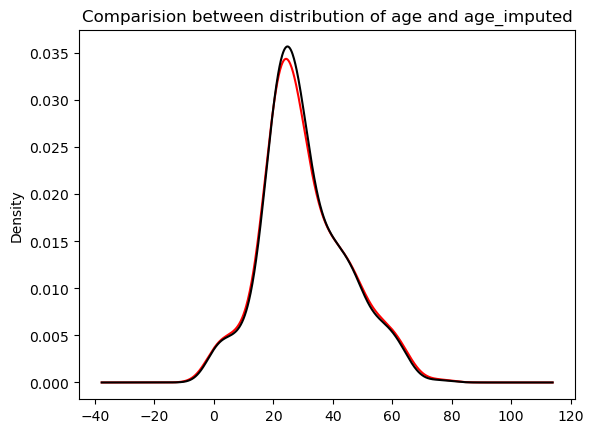

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde' , ax = ax , color = 'red')

df['Age_Imputed'].plot(kind='kde' , ax = ax , color = 'black')
plt.title("Comparision between distribution of age and age_imputed")
plt.show()

In [23]:
df.drop(columns='Age' , inplace= True)

In [24]:
df['Fare'].isnull().mean()*100

0.23923444976076555

<Axes: ylabel='Density'>

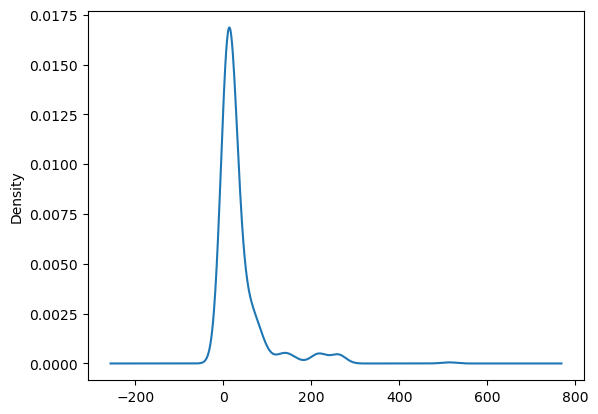

In [25]:
df['Fare'].plot(kind = 'kde')

In [26]:
df.corr(numeric_only=True)

,Survived,Pclass,SibSp,Parch,Fare,Age_Imputed
Survived,1.000000,-0.108615,0.099943,0.159120,0.191514,0.006882
Pclass,-0.108615,1.000000,0.001087,0.018721,-0.577147,-0.411058
SibSp,0.099943,0.001087,1.000000,0.306895,0.171539,-0.109896
Parch,0.159120,0.018721,0.306895,1.000000,0.230046,-0.060953
Fare,0.191514,-0.577147,0.171539,0.230046,1.000000,0.297543
Age_Imputed,0.006882,-0.411058,-0.109896,-0.060953,0.297543,1.000000


In [27]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [28]:
df['Fare'].isnull().sum()

0

In [29]:
pd.crosstab(df['Pclass'] , df['Survived']).T

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


In [30]:
df.drop(columns='Cabin' , inplace = True)

In [31]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_Imputed    0
dtype: int64

## Now there is no null value left in the dataset


In [32]:
df.drop(columns='Name' , inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Age_Imputed  418 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [34]:
cols = ['Pclass' ,'Sex' , 'SibSp' , 'Parch' , 'Embarked']

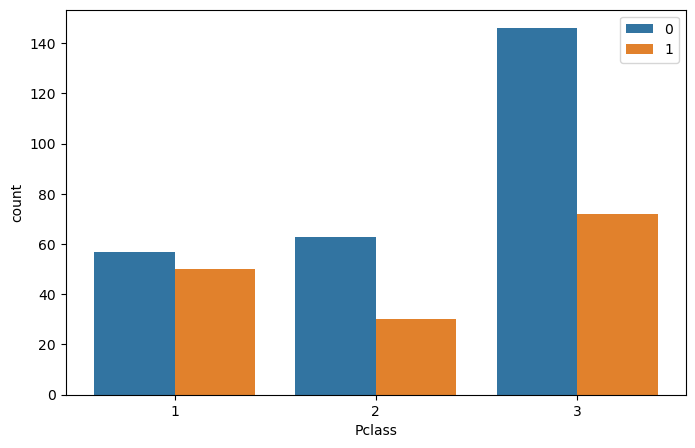

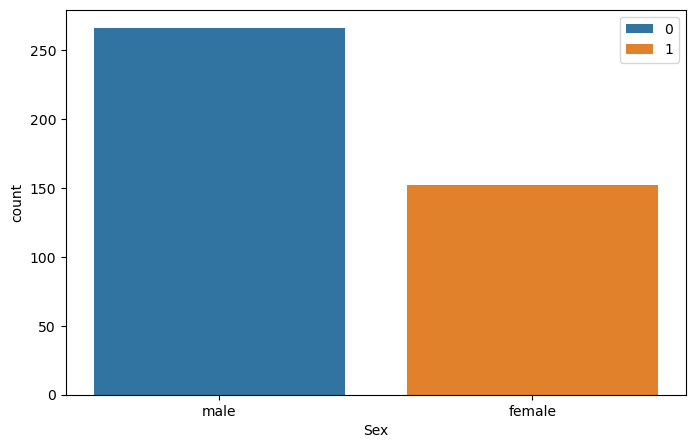

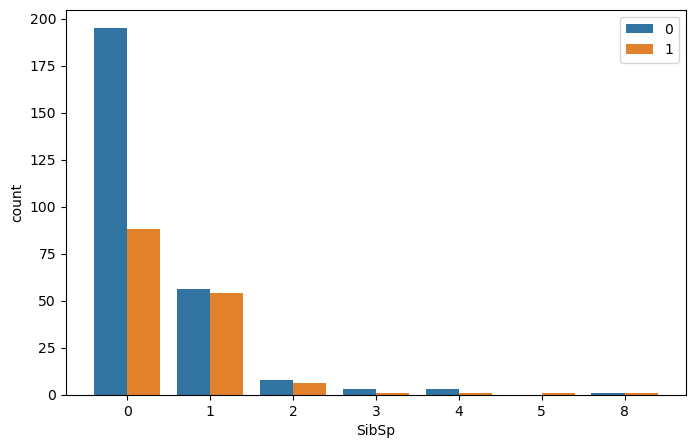

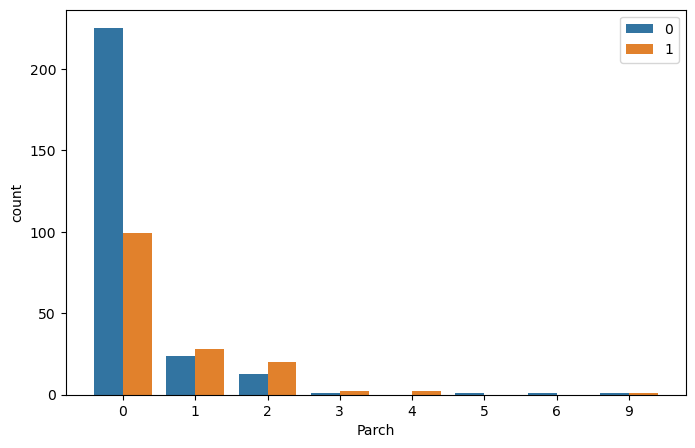

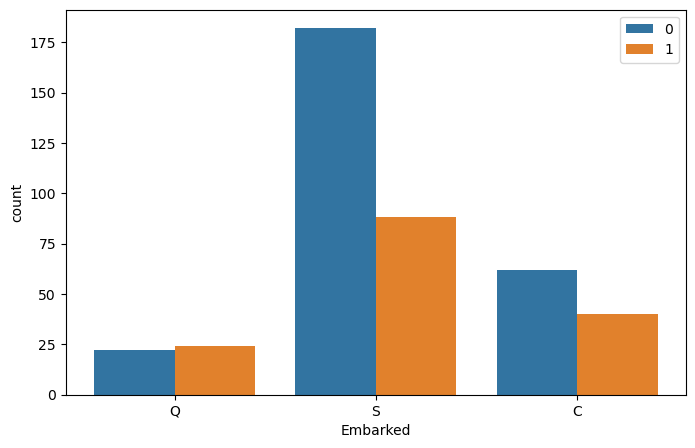

In [35]:
for col in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x = df[col] , data = df , hue = 'Survived')
    plt.legend()
    plt.plot()

In [36]:
df.sample(7)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_Imputed
391,1,1,female,0,1,PC 17592,39.40,S,51.0
355,0,1,male,0,0,113044,26.00,S,50.0
411,1,1,female,1,0,19928,90.00,Q,37.0
344,0,3,male,1,1,A/5. 851,14.50,S,29.0
385,1,2,female,1,2,220845,65.00,S,24.0
175,1,2,female,0,2,29750,39.00,S,15.0
325,0,3,male,0,0,SOTON/O.Q. 3101309,7.05,S,23.0


In [37]:
df.drop(columns='Ticket',inplace=True)

In [38]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Imputed
0,0,3,male,0,0,7.8292,Q,34.5
1,1,3,female,1,0,7.0000,S,47.0
2,0,2,male,0,0,9.6875,Q,62.0
3,0,3,male,0,0,8.6625,S,27.0
4,1,3,female,1,1,12.2875,S,22.0


C:\Users\swaya\AppData\Local\Temp\ipykernel_21332\2539230302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age_Imputed'][df['Sex']=='male'] ,ax=ax , hist=False,color='blue')
C:\Users\swaya\AppData\Local\Temp\ipykernel_21332\2539230302.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

[]

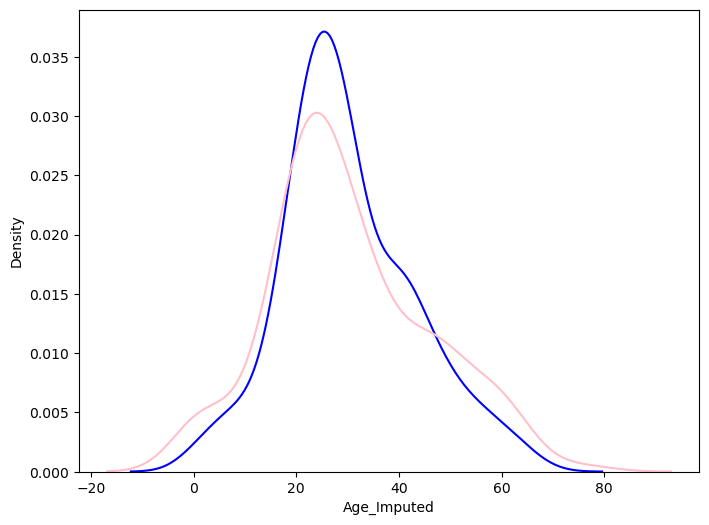

In [39]:
fig = plt.figure(figsize = (8 ,6))
ax = fig.add_subplot(111)
sns.distplot(df['Age_Imputed'][df['Sex']=='male'] ,ax=ax , hist=False,color='blue')
sns.distplot(df['Age_Imputed'][df['Sex']=='female'] ,ax=ax,hist=False , color = 'pink')
plt.plot()

In [40]:
X = df.drop(columns='Survived')
y = df.iloc[: ,0]

In [41]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Imputed
0,3,male,0,0,7.8292,Q,34.5
1,3,female,1,0,7.0000,S,47.0
2,2,male,0,0,9.6875,Q,62.0
3,3,male,0,0,8.6625,S,27.0
4,3,female,1,1,12.2875,S,22.0
...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,13.0
414,1,female,0,0,108.9000,C,39.0
415,3,male,0,0,7.2500,S,38.5
416,3,male,0,0,8.0500,S,21.0


In [42]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

## Train Test Split

In [43]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [44]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Imputed
132,3,female,0,4,25.4667,S,23.0
60,3,male,0,0,7.8958,S,17.0
198,2,male,0,0,10.5000,S,23.0
332,3,male,0,0,7.2250,C,20.0
63,3,female,0,0,7.7250,Q,22.0
...,...,...,...,...,...,...,...
71,3,male,0,0,7.8958,S,21.0
106,3,male,0,0,7.8208,Q,21.0
270,1,male,0,0,75.2417,C,46.0
348,2,male,0,0,13.5000,S,24.0


In [45]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 7)
(313,)
(105,)


In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
trf = ColumnTransformer([
    ('ohe1' , OneHotEncoder(sparse_output=False,drop = 'first') , ['Sex']),
    ('ohe2' , OneHotEncoder(sparse_output=False ,drop = 'first'),['Embarked'])
],remainder = 'passthrough')


In [48]:
X_train_new = trf.fit_transform(X_train)
X_test_new = trf.transform(X_test)

In [49]:
X_train_new.shape

(313, 8)

In [50]:
ohe1_columns = trf.named_transformers_['ohe1'].get_feature_names_out(['Sex'])
ohe2_columns = trf.named_transformers_['ohe2'].get_feature_names_out(['Embarked'])

In [51]:
ohe1_columns

array(['Sex_male'], dtype=object)

In [52]:
ohe2_columns

array(['Embarked_Q', 'Embarked_S'], dtype=object)

In [53]:
remainder_columns = [col for col in X_train.columns if col not in ['Sex', 'Embarked']]

In [54]:
remainder_columns

['Pclass', 'SibSp', 'Parch', 'Fare', 'Age_Imputed']

In [55]:
all_columns = list(ohe1_columns) + list(ohe2_columns) + remainder_columns

In [56]:
all_columns

['Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Age_Imputed']

In [57]:
# For training set
X_train_df = pd.DataFrame(X_train_new, columns=all_columns, index=X_train.index)

# For test set
X_test_df = pd.DataFrame(X_test_new, columns=all_columns, index=X_test.index)

In [58]:
X_train_df

,Sex_male,Embarked_Q,Embarked_S,Pclass,SibSp,Parch,Fare,Age_Imputed
132,0.0,0.0,1.0,3.0,0.0,4.0,25.4667,23.0
60,1.0,0.0,1.0,3.0,0.0,0.0,7.8958,17.0
198,1.0,0.0,1.0,2.0,0.0,0.0,10.5000,23.0
332,1.0,0.0,0.0,3.0,0.0,0.0,7.2250,20.0
63,0.0,1.0,0.0,3.0,0.0,0.0,7.7250,22.0
...,...,...,...,...,...,...,...,...
71,1.0,0.0,1.0,3.0,0.0,0.0,7.8958,21.0
106,1.0,1.0,0.0,3.0,0.0,0.0,7.8208,21.0
270,1.0,0.0,0.0,1.0,0.0,0.0,75.2417,46.0
348,1.0,0.0,1.0,2.0,0.0,0.0,13.5000,24.0


In [59]:
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex_male,313.0,0.629393,0.483741,0.00,0.0000,1.0,1.000,1.0000
Embarked_Q,313.0,0.108626,0.311668,0.00,0.0000,0.0,0.000,1.0000
Embarked_S,313.0,0.635783,0.481981,0.00,0.0000,1.0,1.000,1.0000
Pclass,313.0,2.261981,0.848297,1.00,1.0000,3.0,3.000,3.0000
SibSp,313.0,0.453674,0.908610,0.00,0.0000,0.0,1.000,8.0000
Parch,313.0,0.421725,0.957983,0.00,0.0000,0.0,1.000,9.0000
Fare,313.0,37.813047,59.492028,0.00,7.8875,14.5,34.375,512.3292
Age_Imputed,313.0,30.433419,14.368379,0.33,21.0000,28.0,40.000,76.0000


<Axes: ylabel='Density'>

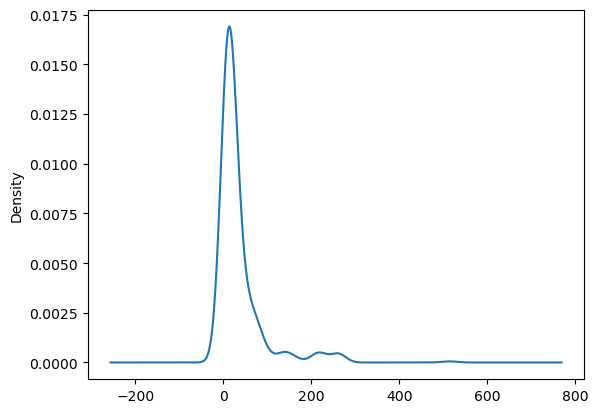

In [60]:
df['Fare'].plot(kind = 'kde')

In [61]:
X_train_df['Fare'] = np.log1p(X_train_df['Fare'])
X_test_df['Fare'] = np.log1p(X_test_df['Fare'])

<Axes: ylabel='Density'>

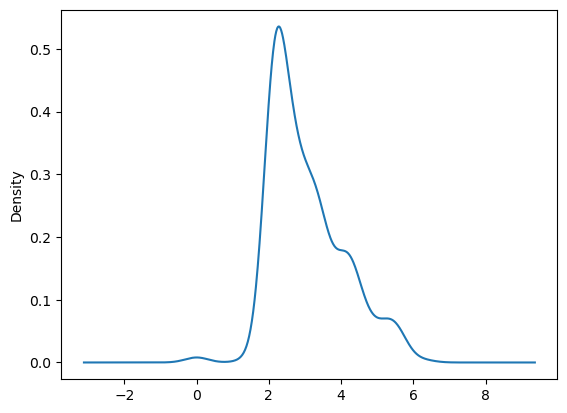

In [62]:
X_train_df['Fare'].plot(kind = 'kde')

In [63]:
X_train_df

,Sex_male,Embarked_Q,Embarked_S,Pclass,SibSp,Parch,Fare,Age_Imputed
132,0.0,0.0,1.0,3.0,0.0,4.0,3.275887,23.0
60,1.0,0.0,1.0,3.0,0.0,0.0,2.185579,17.0
198,1.0,0.0,1.0,2.0,0.0,0.0,2.442347,23.0
332,1.0,0.0,0.0,3.0,0.0,0.0,2.107178,20.0
63,0.0,1.0,0.0,3.0,0.0,0.0,2.166192,22.0
...,...,...,...,...,...,...,...,...
71,1.0,0.0,1.0,3.0,0.0,0.0,2.185579,21.0
106,1.0,1.0,0.0,3.0,0.0,0.0,2.177113,21.0
270,1.0,0.0,0.0,1.0,0.0,0.0,4.333909,46.0
348,1.0,0.0,1.0,2.0,0.0,0.0,2.674149,24.0


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report